In [3]:

from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv("E:/lab1_data/spam.csv", header=0)
data_copy = pd.read_csv("E:/lab1_data/spam.csv",header=0)


In [4]:
mapping_for_spam = {"spam":1, "nonspam":0}
data.type = data.type.map(mapping_for_spam)

In [10]:
data_copy.head()

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

test_size = [i / 20 for i in range(1, 20)]

accuracy = []


for i in test_size:
    features_train, features_test, labels_train, labels_test =  train_test_split(
        data.drop(['type'], axis=1), 
        data['type'], 
        test_size=i)
    gnb = GaussianNB()
    gnb.fit(features_train, labels_train)
    gnb_pred = gnb.predict(features_test)
    accuracy.append(accuracy_score(labels_test, gnb_pred))
    c = classification_report(labels_test, gnb_pred)
    print(c)
    

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       142
           1       0.71      0.96      0.82        89

    accuracy                           0.84       231
   macro avg       0.84      0.86      0.83       231
weighted avg       0.87      0.84      0.84       231

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       277
           1       0.74      0.97      0.84       184

    accuracy                           0.85       461
   macro avg       0.86      0.87      0.85       461
weighted avg       0.88      0.85      0.85       461

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       411
           1       0.73      0.97      0.83       280

    accuracy                           0.84       691
   macro avg       0.85      0.86      0.84       691
weighted avg       0.87      0.84      0.84       691

              preci

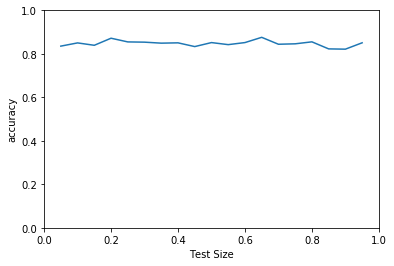

In [19]:
axes = plt.gca()
axes.set_ylabel('accuracy')
axes.set_xlabel('Test Size')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy, label='Test')